Replicated from fast.ai Deep Learning:
This is a sample measuring the speed of a roller coaster as it went over the top of a hump. It would start fast, and then get slower as it went up the hill; it would be slowest at the top, and it would then speed up again as it went downhill. 
I want to build a model of how the speed changes over time. If I were measuring the speed manually every second for 20 seconds:

In [6]:
from fastai.vision.all import * 

In [7]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

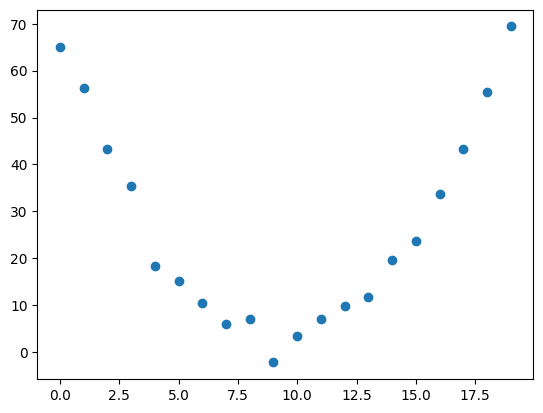

In [8]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2+1
plt.scatter(time,speed);

In [9]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [10]:
def mse(preds, targets): return ((preds-targets)**2).mean()

End-to-end Stochastic Gradient Descent (SGD) example

1) Initialize the weights.
2) For each image, use these weights to predict whether it appears to be a 3 or a 7.
3) Based on these predictions, calculate how good the model is (its loss).
4) Calculate the gradient, which measures for each weight, how changing that weight would change the loss
5) Step (that is, change) all the weights based on that calculation.
6) Go back to the step 2, and repeat the process.
7) Iterate until you decide to stop the training process (for instance, because the model is good enough or you don't want to wait any longer).

In [11]:
# Step 1 : Initialize the parameters to random values and tell PyTorch to track their gradients
params = torch.randn(3).requires_grad_()

#hide
orig_params = params.clone()

In [13]:
# Step 2: Calculate the predictions
preds = f(time, params)

In [14]:
# take a look at the predictions compared to target
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

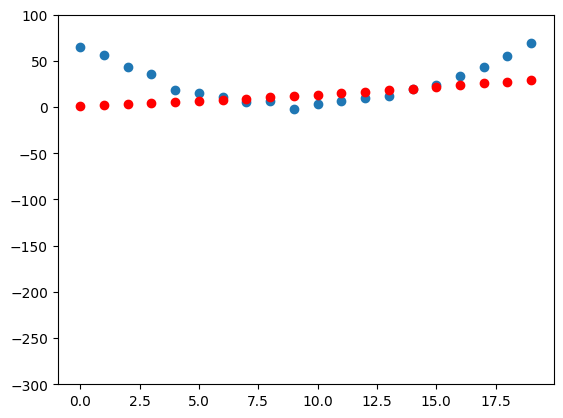

In [15]:
show_preds(preds)

In [16]:
# Step 3: Calculating loss
loss = mse(preds, speed)
loss

# next goal is to improve this loss, therefore we'll need to know the gradients

tensor(656.7412, grad_fn=<MeanBackward0>)

In [17]:
# Step 4: Calcutaling gradients, or an approx of how he parameters need to change:
loss.backward()
params.grad

tensor([-2691.5510,  -154.8427,   -25.7982])

In [18]:
params.grad * 1e-5

tensor([-0.0269, -0.0015, -0.0003])

In [19]:
# using this gradient to improve the parameters. Pick a learning rate 
params

tensor([0.0281, 0.9583, 1.1204], requires_grad=True)

In [20]:
# Step 5: Step the weights

# updating parameters based on the gradients calculated above:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [21]:
# see if loss has improved:
preds = f(time, params)
mse(preds, speed)

tensor(604.5839, grad_fn=<MeanBackward0>)

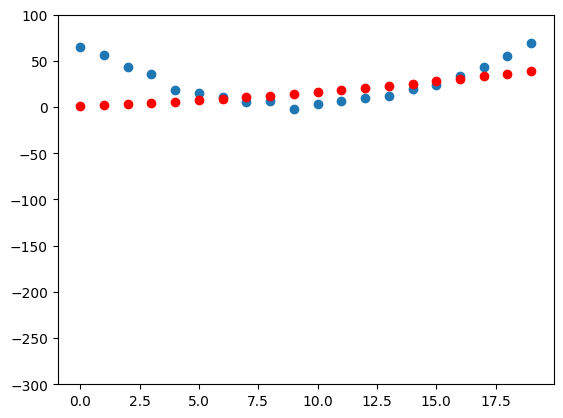

In [22]:
show_preds(preds)

In [23]:
# created a function to apply one step 
def apply_step(params, prn = True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds 

In [24]:
# Step 6: Repeat the process
for i in range(10): apply_step(params)

604.5838623046875
594.7098999023438
592.8373413085938
592.4788208007812
592.4066772460938
592.388916015625
592.3814086914062
592.3758544921875
592.3706665039062
592.365478515625


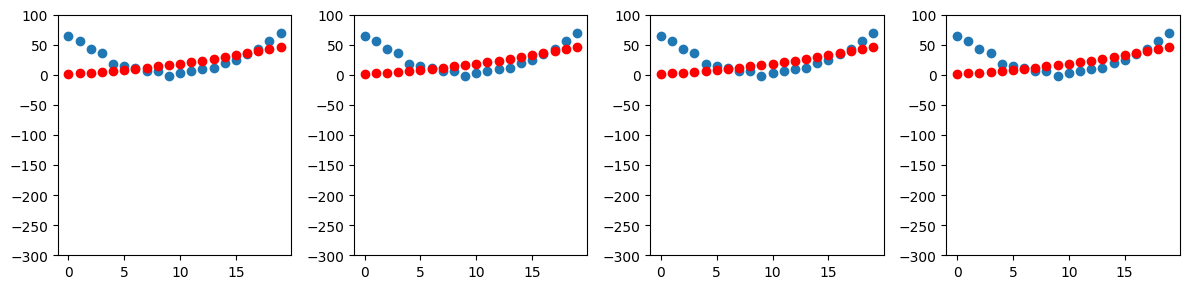

In [26]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [ ]:
# Step 7: Stop after 10 epochs arbitrarily 